In [69]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Evolution of p_top in the F4 run

In [1]:
import nugridpy.utils as utils
from ppmpy.ppm import *
import sys
sys.path.insert(0, '/data/ppm_rpod2/lib/lcse/')
import rprofile as rprofile

import numpy as np
import matplotlib.pyplot as pl
%matplotlib nbagg

F4_prof = yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4')
rp_set = rprofile.rprofile_set('/data/ppm_rpod2/RProfiles/AGBTP_M2.0Z1.e-5/F4/')

cb = utils.colourblind

Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [17]:
prof = F4_prof
dumps = range(0, 1960, 1)
nd = len(dumps)
t = np.zeros(nd)
p_top = np.zeros(nd)

r_top = 32.
r = prof.get('Y', fname = 0, resolution = 'l')
idx_top = np.argmin(np.abs(r - r_top))

for i in range(nd):
    t[i] = prof.get('t', fname = dumps[i], resolution = 'l')[-1]
    p_top[i] = prof.get('P', fname = dumps[i], resolution = 'l')[idx_top]

KeyboardInterrupt: 

r_top = 32.000 Mm


<IPython.core.display.Javascript object>


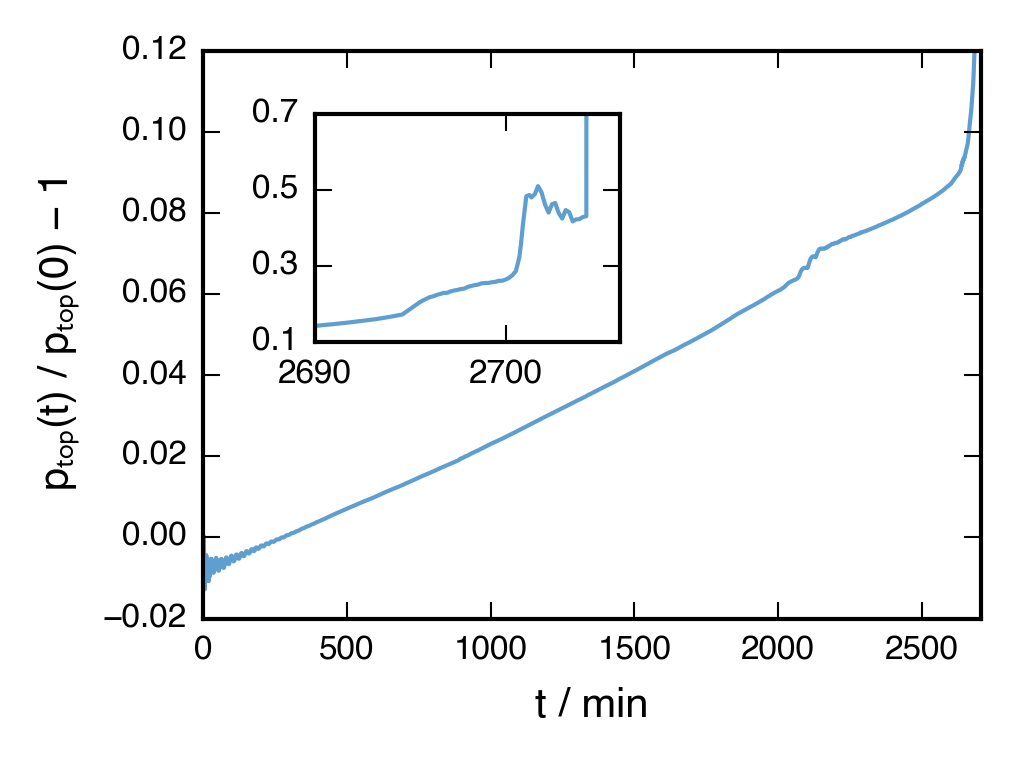

In [84]:
print 'r_top = {:.3f} Mm'.format(r_top)

ifig = 1; plt.close(ifig); fig = plt.figure(ifig)
ax1 = fig.add_subplot(111)
ax1.plot(t/60., p_top/p_top[0] - 1., color=cb(3))
ax1.set_xlim((0., 2706.))
ax1.set_ylim((-0.02, 0.12))
ax1.set_xlabel('t / min')
ax1.set_ylabel(r'p$_\mathrm{top}$(t) / p$_\mathrm{top}$(0) - 1')

left, bottom, width, height = [0.31, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t/60., p_top/p_top[0] - 1., color=cb(3))
ax2.set_xlim((2690., 2706.))
ax2.set_ylim((0.1, 0.6))
ax2.set_xticks(np.arange(2690., 2710., 10.))
ax2.set_yticks(np.arange(0.1, 0.8, 0.2))

fig.tight_layout()
fig.savefig('p_top_evolution_F4.pdf')

In [23]:
def get_p_top(prof,dumps,r_top):
    '''
    Returns p_top and matching time vector
    
    Parameters
    ----------
    yp: yprofile instance
    rtop: float
        boundary radius
    dumps: range
        range of dumps to include can be sparse
        
    Returns
    -------
    Ma_max : vector
        max mach nunmber
    t : vector
        time vector
    '''
    nd = len(dumps)
    t = np.zeros(nd)
    p_top = np.zeros(nd)

    r = prof.get('Y', fname = 0, resolution = 'l')
    idx_top = np.argmin(np.abs(r - r_top))

    for i in range(nd):
        t[i] = prof.get('t', fname = dumps[i], resolution = 'l')[-1]
        p_top[i] = prof.get('P', fname = dumps[i], resolution = 'l')[idx_top]

    return p_top,t

def plot_p_top(yp,dumps,r_top,ifig = 1,lims = None,insert = False,save=False,
                      prefix='PPM',format='pdf',lims_insert =None):
    '''
    Parameters
    ----------
    yp: yprofile instance
    r_top: float
        boundary radius
    dumps: range
        range of dumps to include can be sparse
    lims : list
        Limits for the plot, i.e. [xl,xu,yl,yu].
        If None, the default values are used.
        The default is None.
    save : boolean
        Do you want the figures to be saved for each cycle?
        Figure names will be <prefix>-Vel-00000000001.<format>,
        where <prefix> and <format> are input options that default
        to 'PPM' and 'pdf'.
        The default value is False.
    prefix : string
        see 'save' above
    format : string
        see 'save' above
    '''

    p_top,t = get_p_top(yp,dumps,r_top)
    ifig = ifig; pl.close(ifig); fig = pl.figure(ifig)
    ax1 = fig.add_subplot(111)
    ax1.plot(t/60., p_top/p_top[0] - 1., color=cb(3))
    if lims is not None:
        ax1.set_xlim((lims[0],lims[1]))
        ax1.set_ylim((lims[2],lims[3]))
    ax1.set_xlabel('t / min')
    ax1.set_ylabel(r'p$_\mathrm{top}$(t) / p$_\mathrm{top}$(0) - 1')
    
    if insert:
        left, bottom, width, height = [0.31, 0.55, 0.3, 0.3]
        ax2 = fig.add_axes([left, bottom, width, height])
        ax2.plot(t/60., p_top/p_top[0] - 1., color=cb(3))
        if lims_insert is not None:
            ax2.set_xlim((lims_insert[0],lims_insert[1]))
            ax2.set_ylim((lims_insert[2],lims_insert[3]))
    fig.tight_layout()

    if save:
        pl.savefig(prefix+'_p_top_evolution.'+format,format=format)

<IPython.core.display.Javascript object>


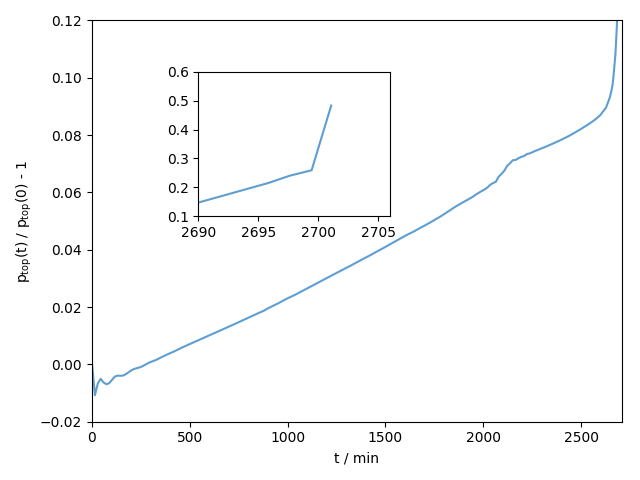

In [25]:
plot_p_top(F4_prof,range(0,1950,10),32.,insert=True,lims=[0., 2706.,-0.02, 0.12],
                 lims_insert =[2690., 2706.,0.1, 0.6 ])
#Plotting every 10th for speed